In [1]:
import tensorflow as tf
import torch

# TensorFlow example
tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# PyTorch example
torch_model = torch.nn.Sequential(
    torch.nn.Linear(10, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 32),
    torch.nn.ReLU(),
    torch.nn.Linear(32, 1),
    torch.nn.Sigmoid()
)

C:\Users\rudra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

# Example usage
weights = np.array([0.5, -0.5, 1.0])
bias = 0.1
neuron = Neuron(weights, bias)
inputs = np.array([2, 3, -1])
output = neuron.feedforward(inputs)
print(f"Neuron output: {output}")

Neuron output: 0.19781611144141825


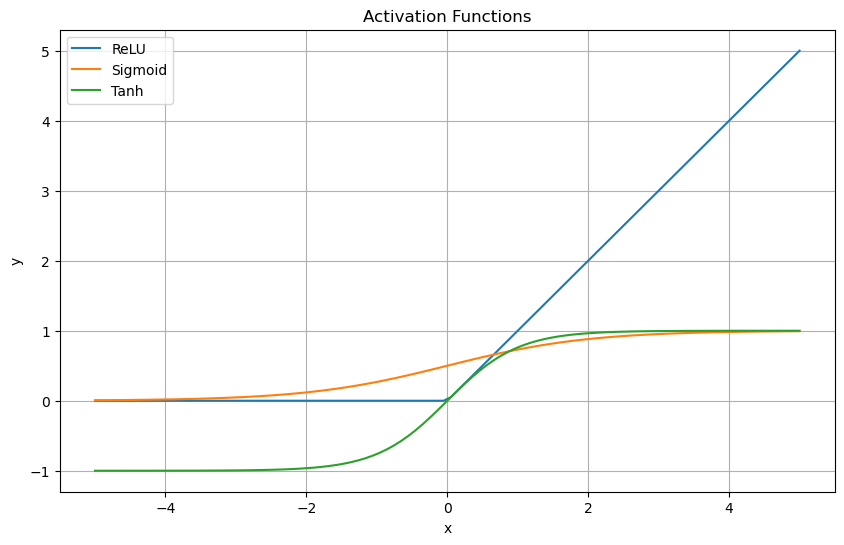

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

x = np.linspace(-5, 5, 100)
plt.figure(figsize=(10, 6))
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, tanh(x), label='Tanh')
plt.legend()
plt.title('Activation Functions')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [7]:
import numpy as np

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1)
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2)
        self.a2 = sigmoid(self.z2)
        return self.a2
    
    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        
        dZ2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dZ2) / m
        
        dZ1 = np.dot(dZ2, self.W2.T) * sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dZ1) / m
        
        self.W2 -= learning_rate * dW2
        self.W1 -= learning_rate * dW1

# Example usage
X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y = np.array([[0], [1], [1], [0]])

nn = SimpleNeuralNetwork(3, 4, 1)
for _ in range(10000):
    output = nn.forward(X)
    nn.backward(X, y, 0.1)

print("Final predictions:")
print(nn.forward(X))

Final predictions:
[[0.01062735]
 [0.98797085]
 [0.99203754]
 [0.01054264]]


In [9]:
import tensorflow as tf

def create_cnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Create and compile the model
model = create_cnn_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

C:\Users\rudra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


RemoteDisconnected: Remote end closed connection without response

In [11]:
import torch
import torch.nn as nn

class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Example usage
input_size = 10
hidden_size = 20
output_size = 1
seq_length = 5
batch_size = 3

model = SimpleRNN(input_size, hidden_size, output_size)
input_seq = torch.randn(batch_size, seq_length, input_size)
output = model(input_seq)

print(f"Input shape: {input_seq.shape}")
print(f"Output shape: {output.shape}")

Input shape: torch.Size([3, 5, 10])
Output shape: torch.Size([3, 1])


In [ ]:
import torch
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, latent_dim, img_shape):
        super(Generator, self).__init__()
        self.img_shape = img_shape
        
        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers
        
        self.model = nn.Sequential(
            *block(latent_dim, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(torch.prod(torch.tensor(img_shape)))),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(img.size(0), *self.img_shape)
        return img

class Discriminator(nn.Module):
    def __init__(self, img_shape):
        super(Discriminator, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(int(torch.prod(torch.tensor(img_shape))), 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        validity = self.model(img_flat)
        return validity

# Example usage
latent_dim = 100
img_shape = (1, 28, 28)  # For MNIST dataset

generator = Generator(latent_dim, img_shape)
discriminator = Discriminator(img_shape)

# Generate fake images
z = torch.randn(64, latent_dim)
fake_images = generator(z)

# Discriminate real vs fake
real_images = torch.randn(64, *img_shape)  # Replace with real data
real_validity = discriminator(real_images)
fake_validity = discriminator(fake_images.detach())

print(f"Generated image shape: {fake_images.shape}")
print(f"Real validity: {real_validity.mean().item()}")
print(f"Fake validity: {fake_validity.mean().item()}")

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from scipy.stats import uniform, randint
import numpy as np

# Generate sample data
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, 1000)

# Define the model
model = MLPClassifier(max_iter=1000)

# Define the hyperparameter search space
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': uniform(0.0001, 0.001),
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': uniform(0.001, 0.01)
}

# Set up the random search
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=2
)

# Perform the search
random_search.fit(X, y)

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'activation': 'relu', 'alpha': 0.0006486608663773528, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.0010631844125917492, 'solver': 'sgd'}
Best score: 0.5250010489531447


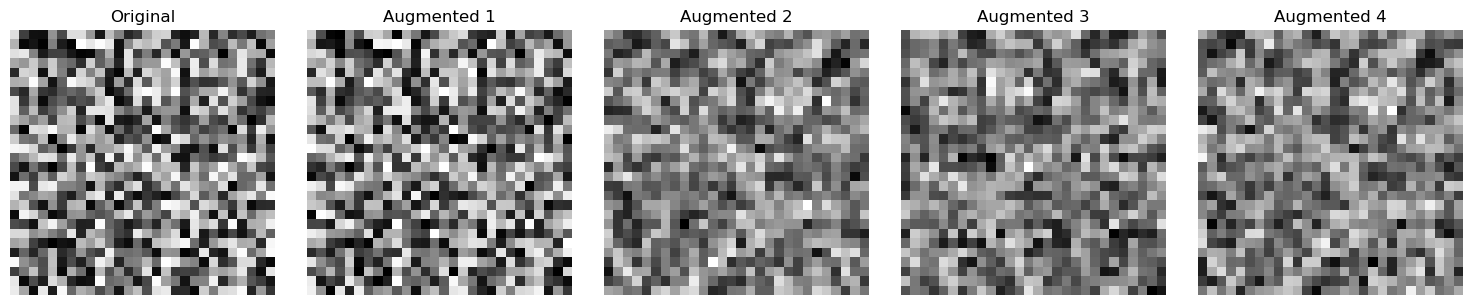

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

def augment_image(image):
    # Rotate
    angle = np.random.uniform(-30, 30)
    rotated = transform.rotate(image, angle, mode='wrap')
    
    # Flip horizontally
    if np.random.rand() > 0.5:
        rotated = np.fliplr(rotated)
    
    # Add noise
    noise = np.random.normal(0, 0.05, rotated.shape)
    noisy = np.clip(rotated + noise, 0, 1)
    
    return noisy

# Generate a sample image
original = np.random.rand(28, 28)

# Create augmented versions
augmented = [augment_image(original) for _ in range(4)]

# Plot original and augmented images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
axes[0].imshow(original, cmap='gray')
axes[0].set_title('Original')
for i, img in enumerate(augmented, 1):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Augmented {i}')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class AttentionLayer(nn.Module):
    def __init__(self, hidden_size):
        super(AttentionLayer, self).__init__()
        self.hidden_size = hidden_size
        self.attention = nn.Linear(hidden_size * 2, hidden_size)
        self.v = nn.Parameter(torch.rand(hidden_size))

    def forward(self, hidden, encoder_outputs):
        seq_len = encoder_outputs.size(0)
        h = hidden.repeat(seq_len, 1, 1).transpose(0, 1)
        encoder_outputs = encoder_outputs.transpose(0, 1)
        attn_energies = self.score(h, encoder_outputs)
        return F.softmax(attn_energies, dim=1).unsqueeze(1)

    def score(self, hidden, encoder_outputs):
        energy = torch.tanh(self.attention(torch.cat([hidden, encoder_outputs], 2)))
        energy = energy.transpose(1, 2)
        v = self.v.repeat(encoder_outputs.size(0), 1).unsqueeze(1)
        energy = torch.bmm(v, energy)
        return energy.squeeze(1)

# Example usage
hidden_size = 256
seq_len = 10
batch_size = 32

hidden = torch.randn(1, batch_size, hidden_size)
encoder_outputs = torch.randn(seq_len, batch_size, hidden_size)

attention_layer = AttentionLayer(hidden_size)
attention_weights = attention_layer(hidden, encoder_outputs)

print(f"Attention weights shape: {attention_weights.shape}")
print(f"Sum of attention weights: {attention_weights.sum().item()}")

Attention weights shape: torch.Size([32, 1, 10])
Sum of attention weights: 32.0


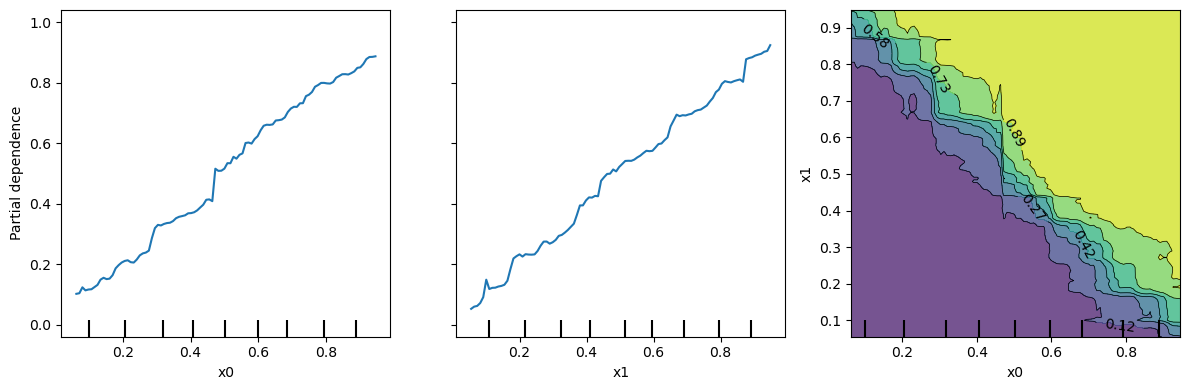

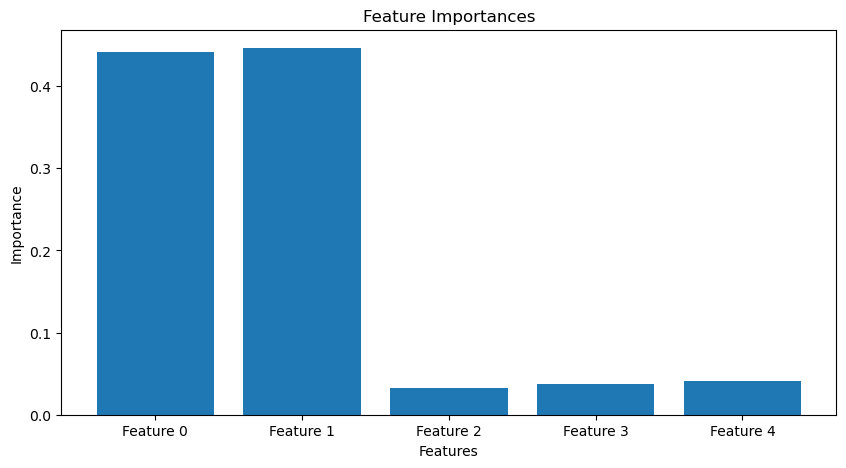

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay

# Generate sample data
X = np.random.rand(1000, 5)
y = (X[:, 0] + X[:, 1] > 1).astype(int)

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Compute partial dependence plots
features = [0, 1, (0, 1)]  # Individual and interaction effects
fig, ax = plt.subplots(figsize=(12, 4))
display = PartialDependenceDisplay.from_estimator(
    clf, X, features, ax=ax
)
plt.tight_layout()
plt.show()

# Feature importance
importances = clf.feature_importances_
feature_names = [f'Feature {i}' for i in range(X.shape[1])]
plt.figure(figsize=(10, 5))
plt.bar(feature_names, importances)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [1]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Example sentences
sentences = [
    "I love this product! It's amazing.",
    "This movie was terrible. I hated it.",
    "The weather is nice today."
]

# Tokenize and encode sentences
inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")

# Make predictions
with torch.no_grad():
    outputs = model(**inputs)

# Get predicted sentiments
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
positive_sentiment = predictions[:, 1].tolist()

# Print results
for sentence, sentiment in zip(sentences, positive_sentiment):
    print(f"Sentence: {sentence}")
    print(f"Positive sentiment: {sentiment:.2f}")
    print()

ModuleNotFoundError: No module named 'transformers'